## Leitura/Analise/Preparaçao dos Dados

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sb

In [2]:
# df = pd.read_csv("ObesityDataSet.csv", sep=',')
df = pd.read_csv("ObesityDataSet.csv")

# Conversoes para Int
df.Age = df.Age.astype('int64')
df.Height = df.Height.astype('int64')
df.Weight = df.Weight.astype('int64')
df.FCVC = df.FCVC.astype('int64')
df.NCP = df.NCP.astype('int64')
df.CH2O = df.CH2O.astype('int64')
df.FAF = df.FAF.astype('int64')
df.TUE = df.TUE.astype('int64')

# Feature Map
df.Gender = df.Gender.replace({'Male': 0, 'Female': 1})
df.family_history_with_overweight = df.family_history_with_overweight.replace({'yes': 0, 'no': 1})
df.FAVC = df.FAVC.replace ({'yes': 0, 'no': 1})
df.CAEC = df.CAEC.replace ({'Sometimes': 0, 'Frequently': 1, 'Always': 2, 'no': 3})
df.SMOKE = df.SMOKE.replace({'yes': 0, 'no': 1})
df.SCC = df.SCC.replace({'yes': 0, 'no': 1})
df.CALC = df.CALC.replace({'Sometimes': 0, 'Frequently': 1, 'Always': 2, 'no': 3})
df.MTRANS = df.MTRANS.replace({'Public_Transportation': 0, 'Walking': 1, 'Automobile': 2, 'Motorbike': 3, 'Bike': 4})
# df.NObeyesdad = df.NObeyesdad.replace({'Normal_Weight': 0, 'Overweight_Level_I': 1, 'Overweight_Level_II': 2, 'Insufficient_Weight': 3, 
#                                        'Obesity_Type_I': 4, 'Obesity_Type_II': 4, 'Obesity_Type_III': 5})

#Informacoes do dataset após mudanças
df.info()
df.shape 
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Gender                          2111 non-null   int64 
 1   Age                             2111 non-null   int64 
 2   Height                          2111 non-null   int64 
 3   Weight                          2111 non-null   int64 
 4   family_history_with_overweight  2111 non-null   int64 
 5   FAVC                            2111 non-null   int64 
 6   FCVC                            2111 non-null   int64 
 7   NCP                             2111 non-null   int64 
 8   CAEC                            2111 non-null   int64 
 9   SMOKE                           2111 non-null   int64 
 10  CH2O                            2111 non-null   int64 
 11  SCC                             2111 non-null   int64 
 12  FAF                             2111 non-null   

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21,1,64,0,1,2,3,0,1,2,1,0,1,3,0,Normal_Weight
1,1,21,1,56,0,1,3,3,0,0,3,0,3,0,0,0,Normal_Weight
2,0,23,1,77,0,1,2,3,0,1,2,1,2,1,1,0,Normal_Weight
3,0,27,1,87,1,1,3,3,0,1,2,1,2,0,1,1,Overweight_Level_I
4,0,22,1,89,1,1,2,1,0,1,2,1,0,0,0,0,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20,1,131,0,0,3,3,0,1,1,1,1,0,0,0,Obesity_Type_III
2107,1,21,1,133,0,0,3,3,0,1,2,1,1,0,0,0,Obesity_Type_III
2108,1,22,1,133,0,0,3,3,0,1,2,1,1,0,0,0,Obesity_Type_III
2109,1,24,1,133,0,0,3,3,0,1,2,1,1,0,0,0,Obesity_Type_III


In [ ]:
sb.pairplot(df)

In [3]:
X = np.array(df.drop('NObeyesdad', axis=1))
X

array([[ 1, 21,  1, ...,  1,  3,  0],
       [ 1, 21,  1, ...,  0,  0,  0],
       [ 0, 23,  1, ...,  1,  1,  0],
       ...,
       [ 1, 22,  1, ...,  0,  0,  0],
       [ 1, 24,  1, ...,  0,  0,  0],
       [ 1, 23,  1, ...,  0,  0,  0]], dtype=int64)

## KMEANS

In [4]:
kmeans = KMeans(n_clusters = 3, random_state=0) #Parametrizando K-Means com 3 Clusters

kmeans.fit(X) # Treino do modelo com os Dados

c:\Users\Cliente\Desktop\MachineLearning\venvml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [5]:
kmeans.cluster_centers_ # Exibindo os Centroids

array([[4.51253482e-01, 2.50208914e+01, 1.00000000e+00, 1.16394150e+02,
        2.78551532e-03, 1.39275766e-02, 2.43175487e+00, 2.72144847e+00,
        2.50696379e-02, 9.76323120e-01, 1.69220056e+00, 9.97214485e-01,
        4.98607242e-01, 1.79665738e-01, 3.88579387e-01, 3.44011142e-01],
       [3.84517766e-01, 2.55393401e+01, 1.00000000e+00, 8.23883249e+01,
        1.21827411e-01, 1.20558376e-01, 2.05076142e+00, 2.29314721e+00,
        2.22081218e-01, 9.82233503e-01, 1.76649746e+00, 9.75888325e-01,
        8.07106599e-01, 3.95939086e-01, 1.20558376e+00, 6.97969543e-01],
       [6.87603306e-01, 2.06876033e+01, 1.00000000e+00, 5.54528926e+01,
        4.74380165e-01, 2.31404959e-01, 2.16528926e+00, 2.58842975e+00,
        5.09090909e-01, 9.78512397e-01, 1.66611570e+00, 8.76033058e-01,
        9.20661157e-01, 6.01652893e-01, 1.25619835e+00, 3.86776860e-01]])

In [6]:
kmeans.labels_ #Clusters

array([2, 2, 1, ..., 0, 0, 0])

In [7]:
df['K-classes'] = kmeans.labels_  #Criacao de nova coluna com os labels
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,K-classes
0,1,21,1,64,0,1,2,3,0,1,2,1,0,1,3,0,Normal_Weight,2
1,1,21,1,56,0,1,3,3,0,0,3,0,3,0,0,0,Normal_Weight,2
2,0,23,1,77,0,1,2,3,0,1,2,1,2,1,1,0,Normal_Weight,1
3,0,27,1,87,1,1,3,3,0,1,2,1,2,0,1,1,Overweight_Level_I,1
4,0,22,1,89,1,1,2,1,0,1,2,1,0,0,0,0,Overweight_Level_II,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20,1,131,0,0,3,3,0,1,1,1,1,0,0,0,Obesity_Type_III,0
2107,1,21,1,133,0,0,3,3,0,1,2,1,1,0,0,0,Obesity_Type_III,0
2108,1,22,1,133,0,0,3,3,0,1,2,1,1,0,0,0,Obesity_Type_III,0
2109,1,24,1,133,0,0,3,3,0,1,2,1,1,0,0,0,Obesity_Type_III,0


In [ ]:
sb.pairplot(df,hue='NObeyesdad')

In [ ]:
sb.pairplot(df, hue='K-classes')

### Calculo WCSSE e Elbow

In [8]:
wcsse = []
maxclusters = 11
for i in range(1, maxclusters):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print (i,kmeans.inertia_)
    wcsse.append(kmeans.inertia_)

1 1532324.71814306
2 504728.5978586308
3 284220.8181457113
4 199615.06738724915
5 162461.067900225
6 129047.55713295375
7 103958.53078462975
8 92919.82441093899
9 86407.83065929716
10 79011.90471453479


c:\Users\Cliente\Desktop\MachineLearning\venvml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Cliente\Desktop\MachineLearning\venvml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Cliente\Desktop\MachineLearning\venvml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Cliente\Desktop\MachineLearning\venvml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureW

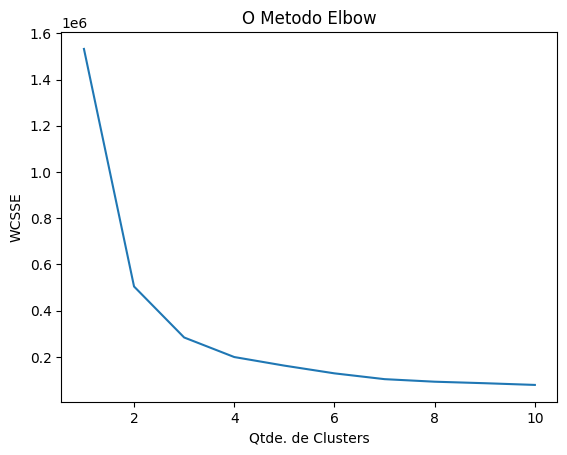

In [9]:
plt.plot(range(1, maxclusters), wcsse)
plt.title('O Metodo Elbow')
plt.xlabel('Qtde. de Clusters')
plt.ylabel('WCSSE') # Within Cluster Sum of Squares
plt.show()

### Testes

In [15]:
usuario= [[1, 21, 1, 64, 0, 1, 2, 3, 0, 1, 2, 1, 0, 1, 3, 0] ] #classe 2
kmeans.predict(usuario)


array([5])

In [ ]:
usuario2 = [[0,	23,	1,	77,	0,	1,	2,	3,	0,	1,	2,	1,	2,	1,	1,	0	] ] #classe 1
kmeans.predict(usuario2)

In [ ]:
usuario3 =  [[1, 20, 1,	131,	0,	0,	3,	3,	0,	1,	1,	1,	1,	0,	0,	0] ] #  classe 0
kmeans.predict(usuario3)